In [29]:
import pandas as pd
data = pd.read_excel("D:\\ml_dataset1.xlsx", nrows=100)
print(data)


             Open time    Open    High     Low   Close  Volume  \
0  2017-11-06 03:54:00  1.5000  1.5000  1.5000  1.5000   10.83   
1  2017-11-06 03:55:00  1.3000  1.3000  1.3000  1.3000    1.00   
2  2017-11-06 03:56:00  1.3000  1.3000  0.5000  0.5000   19.00   
3  2017-11-06 03:57:00  0.5000  0.6100  0.5000  0.6100  253.00   
4  2017-11-06 03:58:00  1.1000  1.1000  1.1000  1.1000   85.00   
..                 ...     ...     ...     ...     ...     ...   
95 2017-11-06 05:29:00  1.5455  1.5455  1.5455  1.5455    0.00   
96 2017-11-06 05:30:00  1.5455  1.5455  1.5455  1.5455    0.00   
97 2017-11-06 05:31:00  1.5525  1.5525  1.5525  1.5525   83.00   
98 2017-11-06 05:32:00  1.5525  1.5525  1.5525  1.5525    0.00   
99 2017-11-06 05:33:00  1.5525  1.5525  1.5525  1.5525  200.00   

                 Close time  Quote asset volume  Number of trades  \
0   2017-11-06 03:54:59.999             16.2450                 2   
1   2017-11-06 03:55:59.999              1.3000                 1   


In [51]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Fill missing values
# For numeric columns: Replace with mean or median
data.fillna(data.mean(numeric_only=True), inplace=True)

# For categorical columns: Replace with mode
for column in data.select_dtypes(include='object'):
    data[column].fillna(data[column].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values in each column:
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

Missing values after handling:
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64


C:\Users\adars\AppData\Local\Temp\ipykernel_20092\1185135212.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [53]:
# Function to detect and handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with upper or lower bound
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

# Detect and handle outliers for numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    handle_outliers(data, column)

print("\nOutliers handled for numeric columns.")



Outliers handled for numeric columns.


In [55]:
print("\nSummary of the dataset after handling missing values and outliers:")
print(data.describe())



Summary of the dataset after handling missing values and outliers:
                 Open time        Open        High         Low       Close  \
count                  100  100.000000  100.000000  100.000000  100.000000   
mean   2017-11-06 04:43:30    1.545057    1.545123    1.544938    1.545023   
min    2017-11-06 03:54:00    1.541888    1.541950    1.541700    1.541888   
25%    2017-11-06 04:18:45    1.544175    1.544200    1.544100    1.544175   
50%    2017-11-06 04:43:30    1.545300    1.545500    1.545100    1.545100   
75%    2017-11-06 05:08:15    1.545700    1.545700    1.545700    1.545700   
max    2017-11-06 05:33:00    1.547988    1.547950    1.548100    1.547988   
std                    NaN    0.002070    0.002033    0.002149    0.002047   

          Volume  Quote asset volume  Number of trades  \
count  100.00000          100.000000        100.000000   
mean    15.54590           23.961781          0.675000   
min      0.00000            0.000000          0.000000 

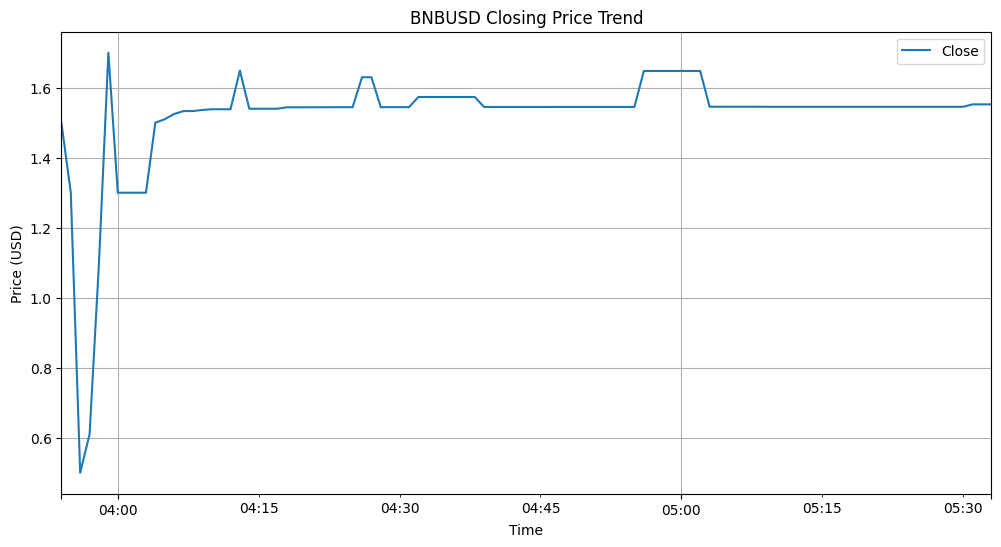

In [45]:
import matplotlib.pyplot as plt

data.plot(x='Open time', y='Close', kind='line', figsize=(12, 6), title="BNBUSD Closing Price Trend")
plt.ylabel("Price (USD)")
plt.xlabel("Time")
plt.grid()
plt.show()



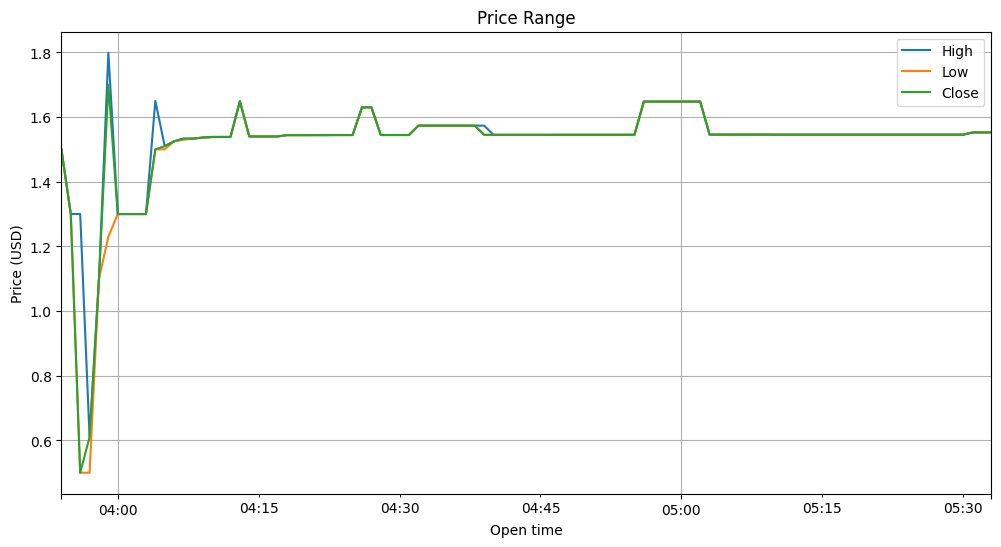

In [47]:
data[['Open time', 'High', 'Low', 'Close']].set_index('Open time').plot(figsize=(12, 6), title="Price Range")
plt.ylabel("Price (USD)")
plt.grid()
plt.show()


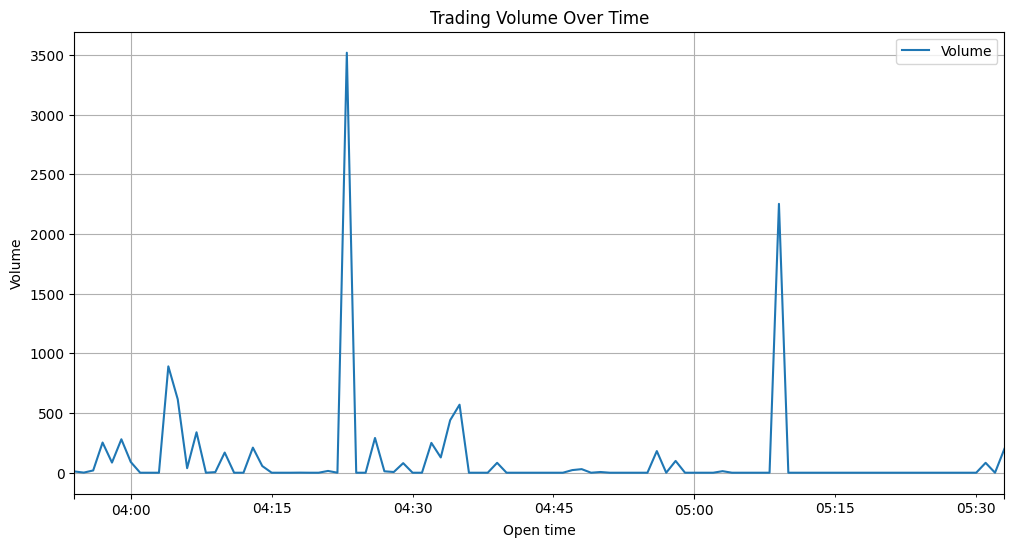

In [49]:
data.plot(x='Open time', y='Volume', kind='line', figsize=(12, 6), title="Trading Volume Over Time")
plt.ylabel("Volume")
plt.grid()
plt.show()



In [1]:
pip install mplfinance


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pandas openpyxl
